### 라이브러리 임포트

In [9]:
import easyocr  # OCR 라이브러리
import cv2      # OpenCV 라이브러리

from PIL import ImageFont, ImageDraw, Image     # 사진 위에 그림을 그릴(네모박스) 라이브러리
import matplotlib.pyplot as plt     # 사진을 표시할 plt
import numpy as np                  # numpy 배열
import pandas as pd                 # DataFrame을 위한 pandas

### 그림(png, jpge)파일 불러오기 및 OCR 실행

In [29]:
# 불러올 파일 경로
path = r'C:\ITStudy\100_SelfProject\2nd_TechSeminar\Data\menu.png'
# path = r'C:\ITStudy\100_SelfProject\2nd_TechSeminar\Data\panel.jpg'
# path = r'C:\ITStudy\100_SelfProject\2nd_TechSeminar\Data\Tesseract_set\test_4.png'

# 이미지 불러오기 - 371 x 1001 x 3 차원 (세로, 가로, 색상채널(BGR))
image_cv = cv2.imread(path)

# OCR 엔진 실행
reader = easyocr.Reader(['ko', 'en'])   # OCR을 실행할 Reader 객체
result =  reader.readtext(path)         # 이미지로 부터 텍스트를 읽어옮

# result: [바운딩 박스 좌표, 인식된 텍스트, 신뢰도] 

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


c:\ITStudy\100_SelfProject\2nd_TechSeminar\.venv\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


![](https://github.com/JaidedAI/EasyOCR/raw/master/examples/easyocr_framework.jpeg)

In [11]:
result

[([[np.int32(968), np.int32(48)],
   [np.int32(1048), np.int32(48)],
   [np.int32(1048), np.int32(310)],
   [np.int32(968), np.int32(310)]],
  '틀',
  np.float64(0.09357601796605852)),
 ([[np.int32(398), np.int32(382)],
   [np.int32(648), np.int32(382)],
   [np.int32(648), np.int32(438)],
   [np.int32(398), np.int32(438)]],
  'uo-sJaAUI',
  np.float64(0.4844479599723378)),
 ([[np.int32(1098), np.int32(336)],
   [np.int32(1178), np.int32(336)],
   [np.int32(1178), np.int32(597)],
   [np.int32(1098), np.int32(597)]],
  '틀',
  np.float64(0.0596238985138422)),
 ([[np.int32(1108), np.int32(580)],
   [np.int32(1168), np.int32(580)],
   [np.int32(1168), np.int32(628)],
   [np.int32(1108), np.int32(628)]],
  'N',
  np.float64(0.23899698976763162)),
 ([[np.float64(519.8783853330272), np.float64(92.32841106522747)],
   [np.float64(904.6193907675067), np.float64(43.714127338073794)],
   [np.float64(910.1216146669728), np.float64(168.67158893477253)],
   [np.float64(526.3806092324933), np.float64(2

### 생성된 결과를 텍스트로 저장

In [12]:
word_list = [[text, round(confidence, 3)] for bbox, text, confidence in result]

df = pd.DataFrame(word_list, columns=['Text', 'Confidence'])
print(df)

        Text  Confidence
0          틀       0.094
1  uo-sJaAUI       0.484
2          틀       0.060
3          N       0.239
4       파이팅다       0.127
5       FISA       0.999
6         우리       1.000
7   Rotation       1.000
8     Worlds       0.257
9          올       0.876


### 생성된 결과를 이미지로 저장

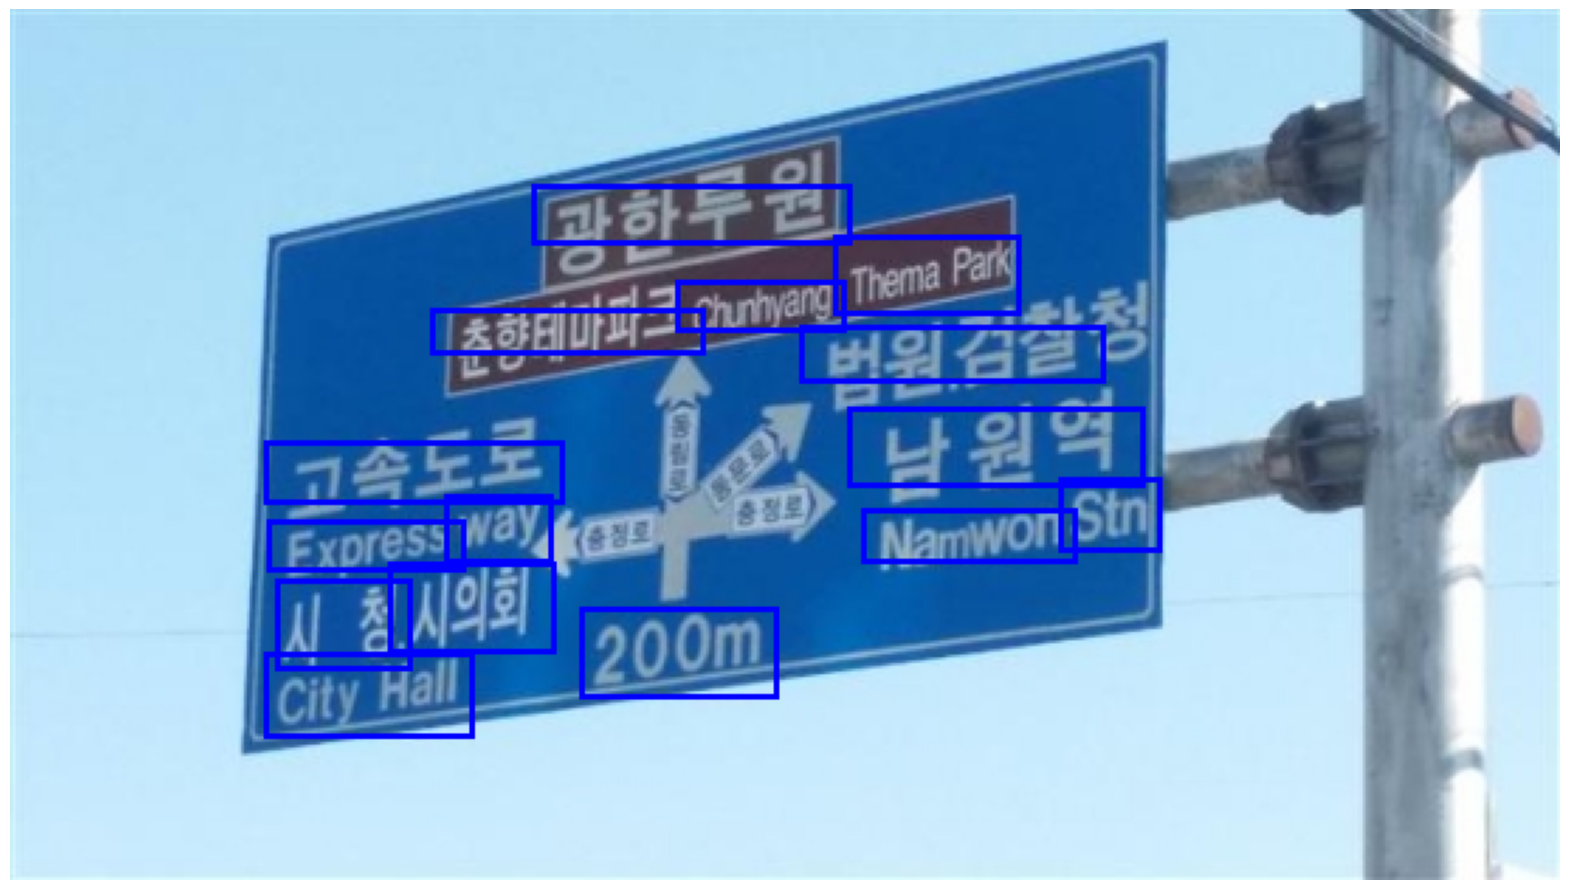

In [25]:
# 3. 색상 채널 변환 (BGR -> RGB): cv2(BGR)로 읽은 이미지를 Pillow(RGB) 형식에 맞게 변환합니다.
image_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
image = Image.fromarray(image_rgb)

# 폰트 설정 (한글 지원 폰트)
# Windows: "malgun.ttf", macOS: "AppleGothic.ttf"
try:
    font = ImageFont.truetype("malgun.ttf", 15)
except IOError:
    font = ImageFont.load_default() # 폰트 파일이 없을 경우 기본 폰트 사용

draw = ImageDraw.Draw(image)

# 인식된 텍스트와 바운딩 박스를 이미지에 그리기
for (bbox, text, prob) in result:
    # bbox는 [[x1,y1], [x2,y2], [x3,y3], [x4,y4]] 형태의 리스트입니다.
    # top_left, bottom_right 좌표를 직접 사용하는 것이 더 명확합니다.
    top_left = tuple(map(int, bbox[0]))
    bottom_right = tuple(map(int, bbox[2]))

    # 바운딩 박스 그리기
    draw.rectangle((top_left, bottom_right), outline="blue", width=2)

    # # 텍스트 그리기 (박스 위에 위치)
    # text_position = (top_left[0], top_left[1] - 20)
    # draw.text(text_position, text, font=font, fill="black")

# 결과 이미지 출력
plt.figure(figsize=(20,12))
plt.imshow(image)
plt.axis('off')  # 축 눈금 숨기기
plt.show()

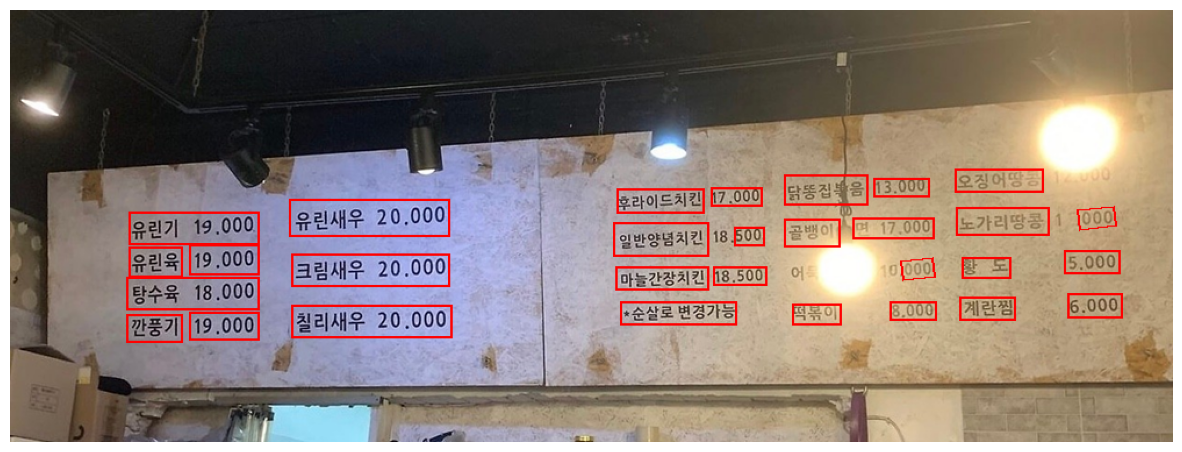

In [30]:
image_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
image = Image.fromarray(image_rgb)

copy_image = image.copy()
draw = ImageDraw.Draw(copy_image)

output_filename = 'easyocr_output_menu.png'

# 신뢰도 임계값 설정
confidence_threshold = 0.5

for bbox, text, confidence in result:
    # 신뢰도가 임계값보다 낮은 결과는 건너뜁니다.
    # if confidence < confidence_threshold:
    #     continue

    # 좌표를 튜플 리스트로 변환 (draw.polygon이 요구하는 형식)
    points = [tuple(p) for p in bbox]

    # 회전된 사각형이므로 draw.polygon을 사용하여 그립니다.
    draw.polygon(points, outline="red", width=2)
    

# 결과 이미지 출력
plt.figure(figsize=(15, 10))
plt.imshow(copy_image)
plt.axis('off')
plt.savefig(
    output_filename,
    dpi=300,  # 해상도(Dots Per Inch) 설정
    bbox_inches='tight' # 그래프 주변의 불필요한 여백을 최소화
)
plt.show()

### 출처

EasyOCR GitHub: https://github.com/JaidedAI/EasyOCR?tab=readme-ov-file

코드 참조: https://velog.io/@joongwon00/%EC%9D%B8%ED%84%B4-%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8-2.-EasyOCR%EC%9D%84-%EC%8D%A8%EB%B3%B4%EC%9E%90

이미지 전처리 기법: https://yonghyn.tistory.com/88


